In [ ]:
# 匯入資料
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)



Mounted at /content/gdrive


In [ ]:
import os

os.listdir()
os.chdir("gdrive/My Drive/GA_final")

In [ ]:
import pandas as pd
os.listdir()
data = pd.read_csv("GA_final.txt",encoding="utf8")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data

,證券代碼,簡稱,年月日,收盤價(元),報酬率％
0,0050,元大台灣50,20170103,60.9271,0.1393
1,0051,元大中型100,20170103,22.6522,-0.1171
2,0052,富邦科技,20170103,37.7551,0
3,0053,元大電子,20170103,25.9755,0.5453
4,0054,元大台商50,20170103,18.6354,-0.0944
...,...,...,...,...,...
1259654,Y8886,未含金電,20210521,15547.9200,2.199
1259655,Y8887,TR未金電,20210521,30406.3600,2.199
1259656,Y8888,不含金融,20210521,14256.4600,1.6348
1259657,Y9997,報酬指數,20210521,31532.3100,1.6188


In [ ]:
data2 = pd.pivot_table(data,values="收盤價(元)",index="年月日",columns="證券代碼")
data2

證券代碼,0050,0051,0052,0053,0054,0055,0056,0057,0061,006203,006204,006205,006206,006207,006208,00625K,00631L,00632R,00633L,00634R,00635U,00636,00636K,00637L,00638R,00639,00640L,00641R,00642U,00643,00643K,00645,00646,00647L,00648R,00650L,00651R,00652,00653L,00654R,...,M9700,M97TR,M9900,M99TR,MSCI,MSCIR,S300R,SA50R,SAM50,SC300,SM50R,SMC50,TDRIN,TDRL2,TF001,TF002,TF003,TF004,TM100,TR100,TRI50,TRTEJ,TWN50,WIT01,WIT02,Y1100,Y1200,Y1300,Y1400,Y1600,Y1900,Y2500,Y2800,Y5555,Y5556,Y8886,Y8887,Y8888,Y9997,Y9999
年月日,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20170103,60.9271,22.6522,37.7551,25.9755,18.6354,12.5787,18.6680,41.99,15.96,28.4171,40.9646,27.25,26.34,20.31,34.1189,5.93,25.06,16.08,33.67,9.39,18.70,16.40,NaN,12.52,18.22,9.46,18.07,17.77,19.95,13.89,2.96,19.28,21.56,23.46,17.42,19.70,12.10,19.58,19.97,18.86,...,138.25,173.90,235.89,324.49,345.36,656.400,5742.49,NaN,NaN,5498.23,NaN,NaN,8596.87,12547.20,5438.92,10189.69,7851.71,11798.18,6293.01,9759.88,11678.55,16484.360,7004.60,8345.39,13230.84,427.60,1359.71,865.44,477.54,2087.46,167.97,239.33,1076.95,13158.99,24473.050,11313.02,18694.53,7827.56,15288.17,9272.88
20170104,60.8848,22.6256,38.0653,26.1428,18.6883,12.5787,18.7326,42.22,16.04,28.7531,40.9646,27.37,26.53,20.45,34.1189,6.01,25.15,16.06,33.91,9.36,18.75,16.48,NaN,12.62,18.12,9.57,18.76,17.51,19.66,14.05,2.99,19.76,21.65,23.57,17.36,19.59,12.16,19.60,20.02,18.87,...,138.24,173.88,236.81,325.75,345.65,656.950,5749.71,NaN,NaN,5505.15,NaN,NaN,8583.82,12585.30,5465.25,10239.01,7870.79,11826.86,6323.94,9807.85,11685.04,16509.270,7008.49,8346.36,13232.38,427.05,1356.64,868.48,474.75,2091.50,169.35,239.33,1077.20,13173.37,24499.550,11329.29,18721.41,7841.01,15311.39,9286.96
20170105,61.4356,22.8734,38.2336,26.2309,18.8204,12.6483,18.7972,42.22,16.04,28.7531,41.2065,27.45,26.58,20.50,34.3117,5.97,25.49,15.96,34.01,9.28,18.95,16.48,NaN,12.65,17.99,9.58,18.68,17.52,19.80,14.12,3.01,19.73,21.63,23.70,17.26,20.07,11.95,19.75,20.27,18.69,...,140.05,176.16,238.83,328.54,348.09,661.580,5788.97,NaN,NaN,5542.74,NaN,NaN,8518.03,12778.22,5486.47,10278.77,7944.10,11937.02,6375.99,9888.58,11767.86,16636.280,7058.17,8387.80,13298.07,428.31,1374.58,876.18,475.72,2106.64,181.11,239.39,1085.46,13280.24,24700.830,11423.20,18876.59,7901.10,15428.73,9358.14
20170106,61.5627,22.9176,38.1982,26.3278,18.8997,12.6657,18.8456,42.64,16.00,28.9082,41.3947,27.43,26.51,20.39,34.3703,5.93,25.61,15.92,33.80,9.30,18.96,16.45,NaN,12.61,18.01,9.53,18.67,17.53,19.93,14.00,2.98,19.76,21.52,23.70,17.25,20.26,11.88,19.77,20.35,18.64,...,137.67,173.16,239.31,329.20,348.98,663.260,5806.24,NaN,NaN,5559.27,NaN,NaN,8505.21,12816.67,5499.94,10304.01,7949.25,11944.76,6393.43,9915.63,11795.87,16661.630,7074.97,8427.57,13361.13,427.53,1375.03,876.87,476.27,2113.44,189.17,239.86,1087.28,13276.06,24693.690,11410.49,18855.59,7912.77,15451.94,9372.22
20170109,61.3932,22.7938,38.6413,26.4158,18.9613,12.6483,18.8133,42.58,16.00,28.9255,41.3947,27.50,26.52,20.42,34.4542,5.93,25.49,15.95,33.97,9.33,18.92,16.44,NaN,12.65,18.03,9.56,19.02,17.38,19.94,13.98,2.95,19.93,21.70,23.87,17.18,20.28,11.90,19.69,20.15,18.74,...,137.66,173.15,237.44,326.62,348.14,661.660,5779.05,NaN,NaN,5533.23,NaN,NaN,8532.25,12735.17,5485.59,10277.12,7908.07,11882.88,6369.93,9879.18,11765.60,16608.420,7056.81,8423.11,13354.05,424.36,1373.36,874.59,470.64,2106.04,186.24,239.91,1085.43,13238.53,24624.250,11373.11,18793.83,7885.81,15402.82,9342.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210517,126.5000,46.8500,113.6000,60.0000,28.1100,19.7200,32.7500,84.45,23.92,58.8000,78.1500,38.68,38.81,31.24,72.5500,8.71,99.10,6.46,69.45,3.82,24.88,27.80,9.93,27.43,7.68,17.09,26.82,11.07,11.10,17.69,4.02,24

In [ ]:
data2.index = pd.to_datetime(data2.index,format="%Y%m%d")
data2

證券代碼,0050,0051,0052,0053,0054,0055,0056,0057,0061,006203,006204,006205,006206,006207,006208,00625K,00631L,00632R,00633L,00634R,00635U,00636,00636K,00637L,00638R,00639,00640L,00641R,00642U,00643,00643K,00645,00646,00647L,00648R,00650L,00651R,00652,00653L,00654R,...,M9700,M97TR,M9900,M99TR,MSCI,MSCIR,S300R,SA50R,SAM50,SC300,SM50R,SMC50,TDRIN,TDRL2,TF001,TF002,TF003,TF004,TM100,TR100,TRI50,TRTEJ,TWN50,WIT01,WIT02,Y1100,Y1200,Y1300,Y1400,Y1600,Y1900,Y2500,Y2800,Y5555,Y5556,Y8886,Y8887,Y8888,Y9997,Y9999
年月日,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,60.9271,22.6522,37.7551,25.9755,18.6354,12.5787,18.6680,41.99,15.96,28.4171,40.9646,27.25,26.34,20.31,34.1189,5.93,25.06,16.08,33.67,9.39,18.70,16.40,NaN,12.52,18.22,9.46,18.07,17.77,19.95,13.89,2.96,19.28,21.56,23.46,17.42,19.70,12.10,19.58,19.97,18.86,...,138.25,173.90,235.89,324.49,345.36,656.400,5742.49,NaN,NaN,5498.23,NaN,NaN,8596.87,12547.20,5438.92,10189.69,7851.71,11798.18,6293.01,9759.88,11678.55,16484.360,7004.60,8345.39,13230.84,427.60,1359.71,865.44,477.54,2087.46,167.97,239.33,1076.95,13158.99,24473.050,11313.02,18694.53,7827.56,15288.17,9272.88
2017-01-04,60.8848,22.6256,38.0653,26.1428,18.6883,12.5787,18.7326,42.22,16.04,28.7531,40.9646,27.37,26.53,20.45,34.1189,6.01,25.15,16.06,33.91,9.36,18.75,16.48,NaN,12.62,18.12,9.57,18.76,17.51,19.66,14.05,2.99,19.76,21.65,23.57,17.36,19.59,12.16,19.60,20.02,18.87,...,138.24,173.88,236.81,325.75,345.65,656.950,5749.71,NaN,NaN,5505.15,NaN,NaN,8583.82,12585.30,5465.25,10239.01,7870.79,11826.86,6323.94,9807.85,11685.04,16509.270,7008.49,8346.36,13232.38,427.05,1356.64,868.48,474.75,2091.50,169.35,239.33,1077.20,13173.37,24499.550,11329.29,18721.41,7841.01,15311.39,9286.96
2017-01-05,61.4356,22.8734,38.2336,26.2309,18.8204,12.6483,18.7972,42.22,16.04,28.7531,41.2065,27.45,26.58,20.50,34.3117,5.97,25.49,15.96,34.01,9.28,18.95,16.48,NaN,12.65,17.99,9.58,18.68,17.52,19.80,14.12,3.01,19.73,21.63,23.70,17.26,20.07,11.95,19.75,20.27,18.69,...,140.05,176.16,238.83,328.54,348.09,661.580,5788.97,NaN,NaN,5542.74,NaN,NaN,8518.03,12778.22,5486.47,10278.77,7944.10,11937.02,6375.99,9888.58,11767.86,16636.280,7058.17,8387.80,13298.07,428.31,1374.58,876.18,475.72,2106.64,181.11,239.39,1085.46,13280.24,24700.830,11423.20,18876.59,7901.10,15428.73,9358.14
2017-01-06,61.5627,22.9176,38.1982,26.3278,18.8997,12.6657,18.8456,42.64,16.00,28.9082,41.3947,27.43,26.51,20.39,34.3703,5.93,25.61,15.92,33.80,9.30,18.96,16.45,NaN,12.61,18.01,9.53,18.67,17.53,19.93,14.00,2.98,19.76,21.52,23.70,17.25,20.26,11.88,19.77,20.35,18.64,...,137.67,173.16,239.31,329.20,348.98,663.260,5806.24,NaN,NaN,5559.27,NaN,NaN,8505.21,12816.67,5499.94,10304.01,7949.25,11944.76,6393.43,9915.63,11795.87,16661.630,7074.97,8427.57,13361.13,427.53,1375.03,876.87,476.27,2113.44,189.17,239.86,1087.28,13276.06,24693.690,11410.49,18855.59,7912.77,15451.94,9372.22
2017-01-09,61.3932,22.7938,38.6413,26.4158,18.9613,12.6483,18.8133,42.58,16.00,28.9255,41.3947,27.50,26.52,20.42,34.4542,5.93,25.49,15.95,33.97,9.33,18.92,16.44,NaN,12.65,18.03,9.56,19.02,17.38,19.94,13.98,2.95,19.93,21.70,23.87,17.18,20.28,11.90,19.69,20.15,18.74,...,137.66,173.15,237.44,326.62,348.14,661.660,5779.05,NaN,NaN,5533.23,NaN,NaN,8532.25,12735.17,5485.59,10277.12,7908.07,11882.88,6369.93,9879.18,11765.60,16608.420,7056.81,8423.11,13354.05,424.36,1373.36,874.59,470.64,2106.04,186.24,239.91,1085.43,13238.53,24624.250,11373.11,18793.83,7885.81,15402.82,9342.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,126.5000,46.8500,113.6000,60.0000,28.1100,19.7200,32.7500,84.45,23.92,58.8000,78.1500,38.68,38.81,31.24,72.5500,8.71,99.10,6.46,69.45,3.82,24.88,27.80,9.93,27.43,7.68,17.09,26.82,11.07,11.10,1

In [ ]:
from datetime import datetime
import numpy as np
start_time = datetime(2017,12,29)
end_time = datetime(2019,12,31)
GA_data = data2.loc[start_time:,:]
drop_col = []
for i in GA_data.columns:
  if ord(i[0])>65:
    drop_col.append(i)
GA_data = GA_data.drop(drop_col,axis= 1).dropna(axis= 1)
GA_data = GA_data.loc[:end_time]
final_return = (GA_data.iloc[-1,:]-GA_data.iloc[1,:])/GA_data.iloc[1,:]
initial_cost = GA_data.iloc[1,:]
GA_data = ((GA_data-GA_data.shift(1))/GA_data.shift(1)).iloc[1:,:]
GA_cov = GA_data.cov()
max_std = GA_data.std().max()
min_std = GA_data.std().min()

In [ ]:
# 找 x 使得最大化 f(x) = 1024 - x^2
# x 用 6 個 binary bit 編碼

import numpy as np
import itertools
# import math
# ==== 參數設定(與演算法相關) ====
parameter_weight = {"return":3,
           "cost":1,
           "std":3}
NUM_ITERATION = 30			# 世代數(迴圈數)

NUM_CHROME = 100				# 染色體個數 (一定要偶數)
NUM_BIT = 20					# 染色體長度

Pc = 0.75    					# 交配率 (代表共執行Pc*NUM_CHROME/2次交配)
Pm = 0.1   					# 突變率 (代表共要執行Pm*NUM_CHROME*NUM_BIT次突變)

NUM_PARENT = NUM_CHROME                         # 父母的個數
NUM_CROSSOVER = int(Pc * NUM_CHROME / 2)        # 交配的次數
NUM_CROSSOVER_2 = NUM_CROSSOVER*2               # 上數的兩倍
NUM_MUTATION = int(Pm * NUM_CHROME * NUM_BIT)   # 突變的次數

PENALTY_COST = 1000

np.random.seed(0)          # 若要每次跑得都不一樣的結果，就把這行註解掉

# ==== 基因演算法會用到的函式 ====
def initPop():             # 初始化群體
  return np.random.randint(len(GA_cov), size=(NUM_CHROME,NUM_BIT)) # 產生 NUM_CHROME 個二元編碼

def fitFunc(x):            # 適應度函數
  total_var = 0
  total_return = 0
  total_cost = initial_cost.iloc[x].sum()
  total_weight = initial_cost/total_cost
  for i in x:
    total_var += total_weight.iloc[i]**2 * GA_cov.iloc[i,i]
    total_return += total_weight.iloc[i] * final_return.iloc[i]
  for i in itertools.combinations(x,2):
    total_var += 2*total_weight.iloc[i[0]]*total_weight.iloc[i[1]]*GA_cov.iloc[i[0],i[1]]
  budget_deduct = 0
  if total_cost>1000:
    budget_deduct = 2*(total_cost-1000)/1000
  elif total_cost < 1000:
    budget_deduct = (1000-total_cost)/1000
  std_deduct = (np.sqrt(total_var)-min_std)/(max_std-min_std)
  count_duplicates = NUM_BIT - len(np.unique(x))
  return total_return*parameter_weight["return"]-std_deduct*parameter_weight["std"]-budget_deduct*parameter_weight["cost"] - 0.1 *count_duplicates

def evaluatePop(p):        # 評估群體之適應度
    return [fitFunc(p[i]) for i in range(len(p))]

def selection(p, p_fit):   # 用二元競爭式選擇法來挑父母
	a = []

	for i in range(NUM_PARENT):
		[j, k] = np.random.choice(NUM_CHROME, 2, replace=False)  # 任選兩個index
		if p_fit[j] > p_fit[k] :                      # 擇優
			a.append(p[j])
		else:
			a.append(p[k])

	return a

def crossover(p):           # 用單點交配來繁衍子代
	a = []

	for i in range(NUM_CROSSOVER) :
		c = np.random.randint(1, NUM_BIT)      		  # 隨機找出單點(不包含0)
		[j, k] = np.random.choice(NUM_PARENT, 2, replace=False)  # 任選兩個染色體

		a.append(np.concatenate((p[j][0: c], p[k][c: NUM_BIT]), axis=0))
		a.append(np.concatenate((p[k][0: c], p[j][c: NUM_BIT]), axis=0))

	return a

def mutation(p):	           # 突變
	for _ in range(NUM_MUTATION) :
		row = np.random.randint(NUM_CROSSOVER_2)  # 任選一個染色體
		col = np.random.randint(NUM_BIT)          # 任選一個基因

		p[row][col] = (p[row][col] + 1) % 2       # 對應此染色體的此基因01互換


def sortChrome(a, a_fit):	    # a的根據a_fit由大排到小
    a_index = range(len(a))                         # 產生 0, 1, 2, ..., |a|-1 的 list

    a_fit, a_index = zip(*sorted(zip(a_fit,a_index), reverse=True)) # a_index 根據 a_fit 的大小由大到小連動的排序

    return [a[i] for i in a_index], a_fit           # 根據 a_index 的次序來回傳 a，並把對應的 fit 回傳

def replace(p, p_fit, a, a_fit):            # 適者生存
    b = np.concatenate((p,a), axis=0)               # 把本代 p 和子代 a 合併成 b
    b_fit = p_fit + a_fit                           # 把上述兩代的 fitness 合併成 b_fit

    b, b_fit = sortChrome(b, b_fit)                 # b 和 b_fit 連動的排序

    return b[:NUM_CHROME], list(b_fit[:NUM_CHROME]) # 回傳 NUM_CHROME 個為新的一個世代


# ==== 主程式 ====

pop = initPop()             # 初始化 pop
pop_fit = evaluatePop(pop)  # 算 pop 的 fit

best_outputs = []                           # 用此變數來紀錄每一個迴圈的最佳解 (new)
best_outputs.append(np.max(pop_fit))        # 存下初始群體的最佳解 (new)

mean_outputs = []                           # 用此變數來紀錄每一個迴圈的平均解 (new)
mean_outputs.append(np.average(pop_fit))        # 存下初始群體的最佳解 (new)

for i in range(NUM_ITERATION) :
    parent = selection(pop, pop_fit)            # 挑父母
    offspring = crossover(parent)               # 交配
    mutation(offspring)                         # 突變
    offspring_fit = evaluatePop(offspring)      # 算子代的 fit
    pop, pop_fit = replace(pop, pop_fit, offspring, offspring_fit)    # 取代

    best_outputs.append(np.max(pop_fit))        # 存下這次的最佳解 (new)
    mean_outputs.append(np.average(pop_fit))    # 存下這次的平均解 (new)

    print('iteration %d: x = %s, y = %f'	%(i, pop[0], pop_fit[0]))


x = pop[0]
total_var = 0
total_return = 0
total_cost = initial_cost.iloc[x].sum()
total_weight = initial_cost/total_cost
for i in x:
  total_var += total_weight.iloc[i]**2 * GA_cov.iloc[i,i]
  total_return += total_weight.iloc[i] * final_return.iloc[i]
for i in itertools.combinations(x,2):
  total_var += 2*total_weight.iloc[i[0]]*total_weight.iloc[i[1]]*GA_cov.iloc[i[0],i[1]]
print("best return %f, best std %f, best cost %f" %(total_return,np.sqrt(total_var),total_cost))

iteration 0: x = [176 524 710 636 499 932  99 358  36 286 626 147 422 428  35 782  29 947
  60 337], y = 1.259033
iteration 1: x = [176 524 710 636 499 932  99 358  36 286 626 147 422 428  35 782  29 947
  60 337], y = 1.259033
iteration 2: x = [176 524 710 636 499 932  99 358  36 286 626 147 422 428  35 782  29 947
  60 337], y = 1.259033
iteration 3: x = [176 524 710 636 499 932  99 358  36 286 626 147 422 428  35 782  29 947
  60 337], y = 1.259033
iteration 4: x = [201 857 710 636 499   1 527   1 157 693 956 798  90 290   1 849 675  71
   0 827], y = 1.341726
iteration 5: x = [176 524 710   0 551 971 662 414 657 710   0 267 397 627 968 389 628 181
 235 193], y = 1.397775
iteration 6: x = [201 857 710 636   0 932  99 358  36 286 626 147 422   1  35 782   0 947
   1 337], y = 1.563882
iteration 7: x = [201 857 710 636 499 971 662   1 657 710   0 267 397 627 968 389 628   0
 235 193], y = 1.942228
iteration 8: x = [201 857 710 636   0 932  99 358  36 710   0 267 397   1  81 154   1 81

In [ ]:
print(pop[0].tolist())

[201, 857, 710, 636, 499, 932, 99, 386, 851, 710, 1, 147, 397, 0, 81, 154, 966, 819, 60, 337]


In [ ]:
port_first = [557, 662, 777, 278, 234, 1, 354, 412, 711, 149, 168, 857, 385, 959, 347, 904, 337, 804, 767, 720]
total_cost_first = initial_cost.iloc[port_first].sum()
print("portfolio(3,1,1)")
print(port_first)
print("symbol")
print(GA_data.columns[port_first])
port_second = [710, 372, 866, 494, 526, 351, 1, 784, 522, 711, 162, 866, 337, 146, 123, 872, 471, 412, 246, 202]
total_cost_second = initial_cost.iloc[port_second].sum()
print("portfolio(3,1,3)")
print(port_second)
print("symbol")
print(GA_data.columns[port_second])
port_third = [639, 295, 478, 452, 904, 807, 553, 120, 710, 287, 797, 578, 932, 0, 337, 830, 1, 555, 302, 917]
total_cost_third = initial_cost.iloc[port_third].sum()
print("portfolio(2,1,3)")
print(port_third)
print("symbol")
print(GA_data.columns[port_third])


portfolio(3,1,1)
[557, 662, 777, 278, 234, 1, 354, 412, 711, 149, 168, 857, 385, 959, 347, 904, 337, 804, 767, 720]
symbol
Index(['2841   ', '3266   ', '4968   ', '1786   ', '1604   ', '0051   ',
       '2316   ', '2404   ', '3661   ', '1414   ', '1446   ', '6230   ',
       '2363   ', '9136   ', '2302   ', '8046   ', '2207   ', '5533   ',
       '4930   ', '3702   '],
      dtype='object', name='證券代碼')
portfolio(3,1,3)
[710, 372, 866, 494, 526, 351, 1, 784, 522, 711, 162, 866, 337, 146, 123, 872, 471, 412, 246, 202]
symbol
Index(['3653   ', '2348   ', '6278   ', '2524   ', '2617   ', '2312   ',
       '0051   ', '5215   ', '2613   ', '3661   ', '1440   ', '6278   ',
       '2207   ', '1409   ', '1304   ', '6405   ', '2483   ', '2404   ',
       '1701   ', '1516   '],
      dtype='object', name='證券代碼')
portfolio(2,1,3)
[639, 295, 478, 452, 904, 807, 553, 120, 710, 287, 797, 578, 932, 0, 337, 830, 1, 555, 302, 917]
symbol
Index(['3050   ', '2002A  ', '2492   ', '2458   ', '8046   ', '56

In [ ]:
# 繪圖參數
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
GA_result = [port_first,port_second,port_third] # 所有結果 不同參數
total_cost = [total_cost_first,total_cost_second,total_cost_third]   # 投組成本(2年前)


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669., 737791., 737911.]),
 <a list of 11 Text major ticklabel objects>)

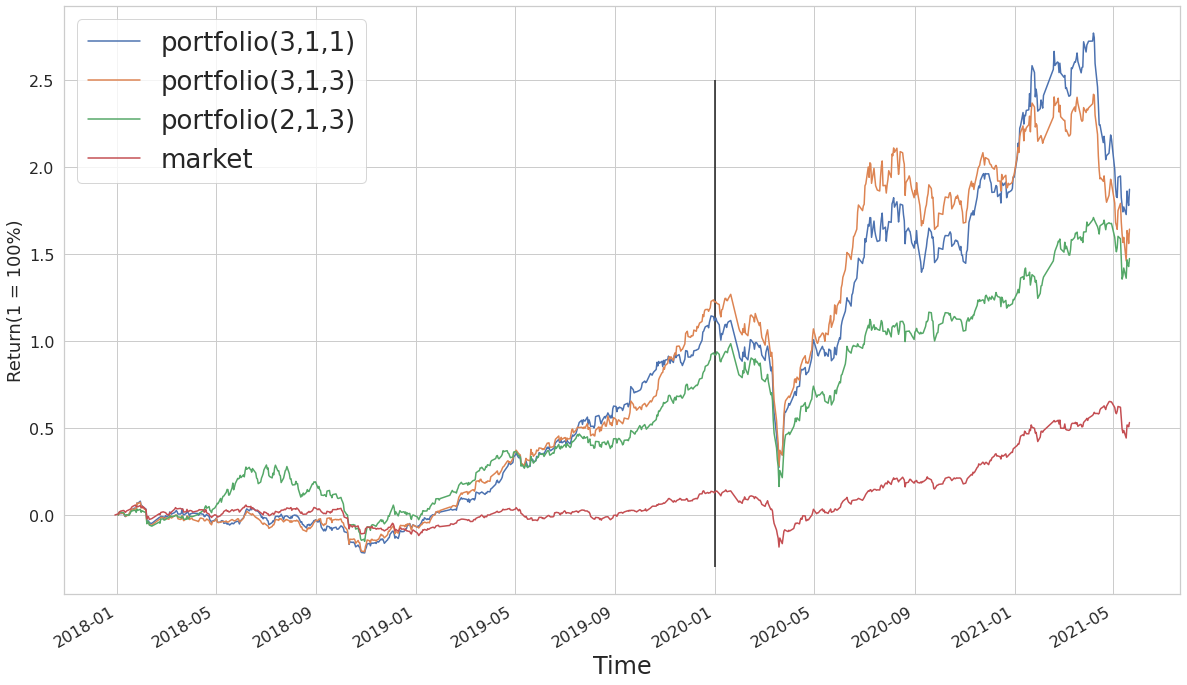

In [ ]:
# 加總投組成本與大盤比較
plt.figure(figsize=(20,12))
market_cost = data2.loc[start_time,"Y9999  "]
valid_time = datetime(2020,1,1)   # 時間區間設定
# 第一組
plot_data = data2.loc[start_time:,:].drop(drop_col,axis= 1).dropna(axis= 1)
plot_data = plot_data.iloc[1:,:]
plot_data = plot_data.iloc[:,GA_result[0]]
((plot_data.sum(axis= 1)-total_cost[0])/total_cost[0]).plot(label = "portfolio(3,1,1)")
# 第二組
plot_data = data2.loc[start_time:,:].drop(drop_col,axis= 1).dropna(axis= 1)
plot_data = plot_data.iloc[1:,:]
plot_data = plot_data.iloc[:,GA_result[1]]
((plot_data.sum(axis= 1)-total_cost[1])/total_cost[1]).plot(label = "portfolio(3,1,3)")
# 第三組
plot_data = data2.loc[start_time:,:].drop(drop_col,axis= 1).dropna(axis= 1)
plot_data = plot_data.iloc[1:,:]
plot_data = plot_data.iloc[:,GA_result[2]]
((plot_data.sum(axis= 1)-total_cost[2])/total_cost[2]).plot(label = "portfolio(2,1,3)")


((data2.loc[start_time:,"Y9999  "]-market_cost)/market_cost).plot(label="market")
plt.legend(prop={'size': 26})
plt.xlabel("Time",fontsize = 24)
plt.ylabel("Return(1 = 100%)",fontsize = 18,rotation = 90)
plt.vlines(x=valid_time,ymax=2.5,ymin=-0.3)
plt.yticks(fontsize= 16)
plt.xticks(fontsize= 16)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


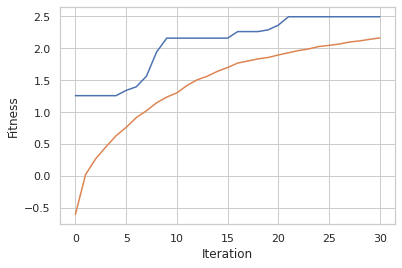

In [ ]:
# 畫圖 (new) oneP
import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.plot(mean_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [ ]:

df[df.p>101]